In [453]:
import sys

import tensorflow.keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import sklearn as sk
from sklearn import svm
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

%load_ext autoreload
%autoreload 2 
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [454]:
# Load the dataset into pandas
df = pd.read_csv("supervised.csv")
training_data, test_data = train_test_split(df, test_size = 0.2)

# Split the data into the x labels and y labels
features = np.array([feature for feature in df.columns if feature != "outcome" and feature != "home_team" and feature != "away_team" and feature != "date"])
label = np.array(["outcome"])
x_training_data = training_data[features]
y_training_data = training_data[label]
x_test_data = test_data[features]
y_test_data = test_data[label]

# Convert float labels to integer labels
y_training_data = y_training_data.astype(int)
y_test_data = y_test_data.astype(int)

print("Training data: size {}, feature_size: {}".format(x_training_data.shape[0], x_training_data.shape[1]))
print("Test data: size {}, feature_size: {}".format(x_test_data.shape[0], x_test_data.shape[1]))

Training data: size 2747, feature_size: 38
Test data: size 687, feature_size: 38


In [460]:
# Create the NN model on keras
epochs = 75
init_lr = 0.001

model = Sequential(
    [
#         Dense(units = 5, activation = LeakyReLU(alpha = 0.1), input_shape = (1, x_training_data.shape[1])),
#         Dense(units = 1, activation = LeakyReLU()),
#         Dense(units = 50, activation = LeakyReLU()),
#         Dense(units = 50, activation = LeakyReLU()),
#         Dense(units = 50, activation = LeakyReLU()),
        Dense(units = 2, activation = 'softmax', input_shape = (1, x_training_data.shape[1]))
    ]
)
optimizer = tf.keras.optimizers.Adam(learning_rate=init_lr)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 1, 2)              78        
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [461]:
def lr_scheduler(epoch):
    new_lr = init_lr * 0.9 ** epoch
    print("Learning rate:", new_lr)
    return new_lr


# Train the model on data
history = model.fit(x = x_training_data,
          y = y_training_data,
          epochs = epochs,
          shuffle = True,
          verbose = 1,
          initial_epoch = 0,
          callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)],
          validation_data = (x_test_data, y_test_data)
         )

Epoch 1/75
Learning rate: 0.001
 7/86 [=>............................] - ETA: 0s - loss: 522.7815 - accuracy: 0.5848 

2022-04-23 14:16:39.612382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 1s 7ms/step - loss: 302.8962 - accuracy: 0.5417 - val_loss: 31.7913 - val_accuracy: 0.4556
Epoch 2/75
Learning rate: 0.0009000000000000001
14/86 [===>..........................] - ETA: 0s - loss: 41.5237 - accuracy: 0.3616

2022-04-23 14:16:40.171978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 0s 5ms/step - loss: 30.4028 - accuracy: 0.4310 - val_loss: 24.1591 - val_accuracy: 0.4687
Epoch 3/75
Learning rate: 0.0008100000000000001
86/86 [==============================] - 0s 5ms/step - loss: 21.4373 - accuracy: 0.4554 - val_loss: 16.6310 - val_accuracy: 0.4847
Epoch 4/75
Learning rate: 0.0007290000000000002
86/86 [==============================] - 0s 4ms/step - loss: 14.5091 - accuracy: 0.4954 - val_loss: 12.2316 - val_accuracy: 0.5298
Epoch 5/75
Learning rate: 0.0006561000000000001
86/86 [==============================] - 0s 4ms/step - loss: 11.0468 - accuracy: 0.5311 - val_loss: 9.3253 - val_accuracy: 0.5866
Epoch 6/75
Learning rate: 0.00059049
86/86 [==============================] - 0s 5ms/step - loss: 8.8492 - accuracy: 0.5715 - val_loss: 7.9044 - val_accuracy: 0.6084
Epoch 7/75
Learning rate: 0.000531441
86/86 [==============================] - 0s 4ms/step - loss: 7.3037 - accuracy: 0.5890 - val_loss: 6.6475 - val_accuracy: 0.6172


86/86 [==============================] - 0s 4ms/step - loss: 0.7201 - accuracy: 0.7961 - val_loss: 0.7921 - val_accuracy: 0.7918
Epoch 49/75
Learning rate: 6.36268544113595e-06
86/86 [==============================] - 0s 4ms/step - loss: 0.7207 - accuracy: 0.7972 - val_loss: 0.7885 - val_accuracy: 0.7933
Epoch 50/75
Learning rate: 5.726416897022355e-06
86/86 [==============================] - 0s 4ms/step - loss: 0.7195 - accuracy: 0.7980 - val_loss: 0.7879 - val_accuracy: 0.8020
Epoch 51/75
Learning rate: 5.15377520732012e-06
86/86 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.8005 - val_loss: 0.7876 - val_accuracy: 0.7933
Epoch 52/75
Learning rate: 4.638397686588108e-06
86/86 [==============================] - 0s 4ms/step - loss: 0.7170 - accuracy: 0.8012 - val_loss: 0.7861 - val_accuracy: 0.8006
Epoch 53/75
Learning rate: 4.174557917929297e-06
86/86 [==============================] - 0s 4ms/step - loss: 0.7155 - accuracy: 0.7976 - val_loss: 0.7852 - val_

In [462]:
score = model.evaluate(x_test_data, y_test_data, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7793468236923218
Test accuracy: 0.7947598099708557


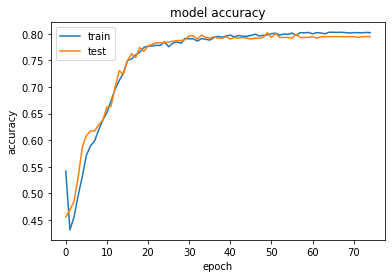

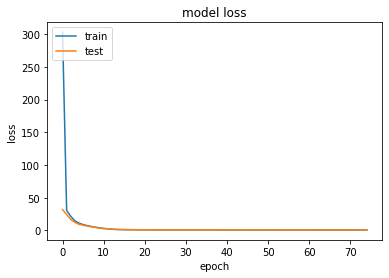

In [463]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**We are able to achieve a very high accuracy with just one hidden layer and very less number of neurons. The reason for this could be that the data is in a linearly separable hyperplane.** We can verify this by fitting this model to the SVM model. With the linear kernel, we should be getting a very high accuracy in this situation.

In [459]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_training_data, y_training_data.to_numpy().flatten())
y_pred = clf.predict(x_test_data)
print("Accuracy: ", metrics.accuracy_score(y_test_data, y_pred))
print("Precision:",metrics.precision_score(y_test_data, y_pred))
print("Recall:",metrics.recall_score(y_test_data, y_pred))

Accuracy:  1.0
Precision: 1.0
Recall: 1.0


In [464]:
model.get_weights()

[array([[-0.22246373, -0.24569103],
        [ 0.31511787,  0.08477948],
        [ 0.24549863,  0.20033395],
        [-0.1447477 , -0.17950615],
        [-0.20390701,  0.04341399],
        [-0.15742896, -0.2611222 ],
        [ 0.07995757, -0.18919896],
        [ 0.09652849, -0.12543485],
        [-0.31324342, -0.18777852],
        [-0.21932535,  0.15768242],
        [-0.11400485,  0.32423365],
        [-0.15756656, -0.01264364],
        [ 0.34741583,  0.04246871],
        [-0.26929033, -0.10603309],
        [-0.23058224, -0.11943485],
        [-0.00272805,  0.382596  ],
        [ 0.22419032,  0.24222006],
        [ 0.33703968, -0.16297829],
        [-0.17297249, -0.05792554],
        [ 0.23338974, -0.16820596],
        [-0.06982149, -0.25447544],
        [-0.1625563 ,  0.09494158],
        [-0.22064494,  0.30582064],
        [-0.2457376 ,  0.0829804 ],
        [-0.05508283, -0.3633585 ],
        [-0.02972331, -0.20750555],
        [ 0.26083523,  0.27785155],
        [-0.19526781, -0.158